In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

**Splitting the dataset into the Training set and Test set**

In [ ]:
df.isna().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Feature Scaling**

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [6]:
X=df.drop(columns=['Purchased','Gender','User ID'])
Y=df['Purchased']

In [7]:
X.head()


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [18]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(max_depth=88,n_estimators=5)
randomforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=88, n_estimators=5)

**Predicting the Test set results**

In [19]:
y_pred=randomforest.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

**Making the Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix
y_pred=randomforest.predict(X_test)
com = confusion_matrix(y_test, y_pred)
com

array([[35,  4],
       [ 9, 32]])

**Visualising the Training set results**

In [22]:
randomforest.score(X_train,y_train)*100

97.5

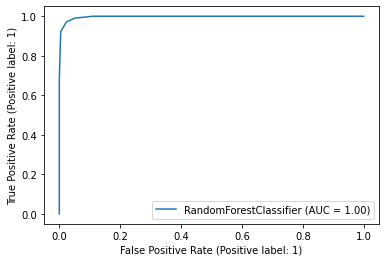

In [24]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(randomforest,X_train,y_train)

**Visualising the Test set results**

In [29]:
from sklearn.metrics import accuracy_score

test_score=accuracy_score(y_test,y_pred)*100
test_score

83.75

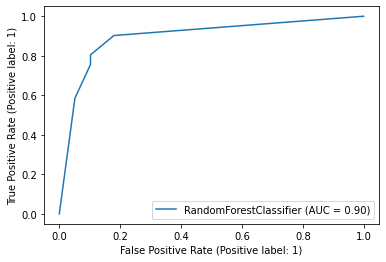

In [27]:
RocCurveDisplay.from_estimator(randomforest,X_test,y_test)